In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv("/content/gdrive/My Drive/deepLearning/data/credit_card_data.csv", 
                 names = ["Student", "Income", "Balance", "Default"])

In [3]:
print(df.head())

   Student       Income      Balance  Default
0        0   729.526495  44361.62507        0
1        1   817.180407  12106.13470        0
2        0  1073.549164  31767.13895        0
3        1   529.250605  35704.49394        0
4        0   785.655883  38463.49588        0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Student  10000 non-null  int64  
 1   Income   10000 non-null  float64
 2   Balance  10000 non-null  float64
 3   Default  10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB
None


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


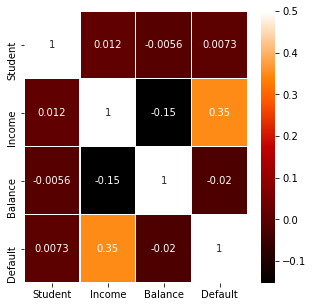

In [6]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)

<function matplotlib.pyplot.show>

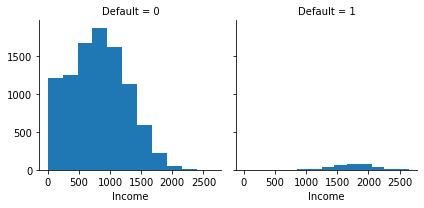

In [7]:
grid = sns.FacetGrid(df, col='Default')
grid.map(plt.hist, 'Income', bins=10)
plt.show

In [8]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import tensorflow as tf

In [9]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [10]:
dataset = np.loadtxt("/content/gdrive/My Drive/deepLearning/data/credit_card_data.csv", delimiter=",")
X = dataset[:,0:3]
Y = dataset[:,3]

In [11]:
model = Sequential()
model.add(Dense(99, input_dim=3, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.fit(X, Y, epochs=100, batch_size=10)

Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5215 - accuracy: 0.9646
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3008 - accuracy: 0.9667
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2125 - accuracy: 0.9667
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1739 - accuracy: 0.9667
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1571 - accuracy: 0.9667
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1501 - accuracy: 0.9667
Epoch 7/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1474 - accuracy: 0.9667
Epoch 8/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1465 - accuracy: 0.9667
Epoch 9/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1462 - accuracy: 0.9667
Epoch 10/100
1000/1000 [==============================] - 1s 1ms/step - l

In [14]:
print("Accuracy : %.4f" %(model.evaluate(X, Y)[1]))

313/313 [==============================] - 0s 954us/step - loss: 0.1460 - accuracy: 0.9667
Accuracy : 0.9667
